In [23]:
import pandas as pd


airbnb_madrid_property = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")


airbnb_madrid_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


airbnb_madrid_conditions = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


airbnb_madrid_host = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_host.parquet")


airbnb_madrid_location = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_location.parquet")


#airbnb_madrid_property.columns

airbnb_madrid_property['amenities_wifi_internet'].unique()


array([1, 0], dtype=int64)

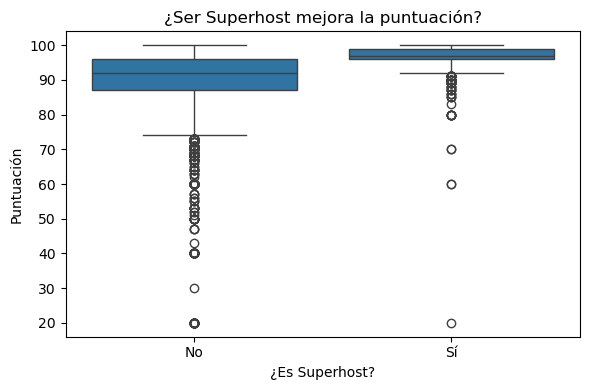

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_host = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_host.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


# Merge
df = pd.merge(
    df_host[['id', 'host_is_superhost']],
    df_reviews[['id', 'review_scores_rating']],
    on='id'
)

# Filtrar y mapear
df = df.dropna(subset=['review_scores_rating'])
df['host_is_superhost'] = df['host_is_superhost'].map({1: 'Sí', 0: 'No'})

# Gráfico
plt.figure(figsize=(6, 4))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df)
plt.title('¿Ser Superhost mejora la puntuación?')
plt.xlabel('¿Es Superhost?')
plt.ylabel('Puntuación')
plt.tight_layout()
plt.show()




In [ ]:
#EXPLICACION DEL GRAFICO de arriba 

📈 Interpretación:

    Si la caja de "Sí" (Superhost) está más alta → los Superhosts obtienen mejores valoraciones.

    Si la diferencia es notable → ser Superhost sí impacta positivamente en la satisfacción del huésped.

    Justifica invertir en:

        Mejorar tiempos de respuesta

        Foto de perfil

        Identidad verificada

        Buen historial de reviews




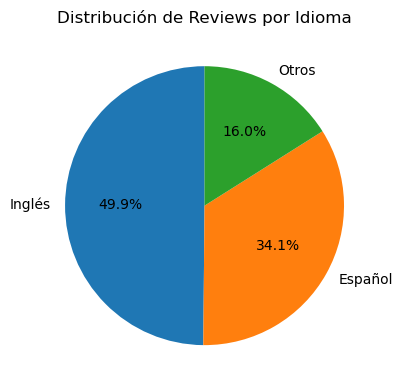

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


# Sumar totales por idioma
idiomas = {
    'Inglés': df_reviews['number_of_reviews_en'].sum(),
    'Español': df_reviews['number_of_reviews_es'].sum(),
    'Otros': df_reviews['number_of_reviews_otros'].sum()
}

# Convertir a dataframe para gráfico
df_idiomas = pd.DataFrame.from_dict(idiomas, orient='index', columns=['reviews'])
df_idiomas['porcentaje'] = df_idiomas['reviews'] / df_idiomas['reviews'].sum() * 100

# Gráfico
plt.figure(figsize=(6, 4))
plt.pie(df_idiomas['porcentaje'], labels=df_idiomas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Reviews por Idioma')
plt.tight_layout()
plt.show()




In [ ]:
#de arrriba el del quesito


# ¿Qué obtienes?

    Un gráfico circular con el porcentaje de reviews por idioma.

    Tabla con recuento y %.

📌 Recomendación según resultados:

    Si inglés supera 30–40%:

        Añadir versión web en inglés.

        Traducir bienvenida, instrucciones y carteles.

        Ofrecer contacto por WhatsApp/email en inglés.

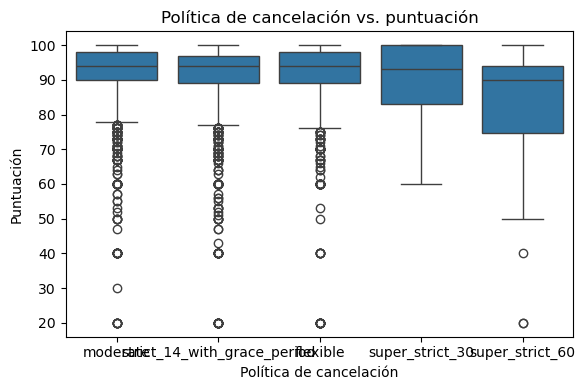

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df = pd.merge(df_cond[['id', 'cancellation_policy']], df_reviews[['id', 'review_scores_rating']], on='id')
df = df.dropna()

plt.figure(figsize=(6, 4))
sns.boxplot(x='cancellation_policy', y='review_scores_rating', data=df)
plt.title('Política de cancelación vs. puntuación')
plt.xlabel('Política de cancelación')
plt.ylabel('Puntuación')
plt.tight_layout()
plt.show()




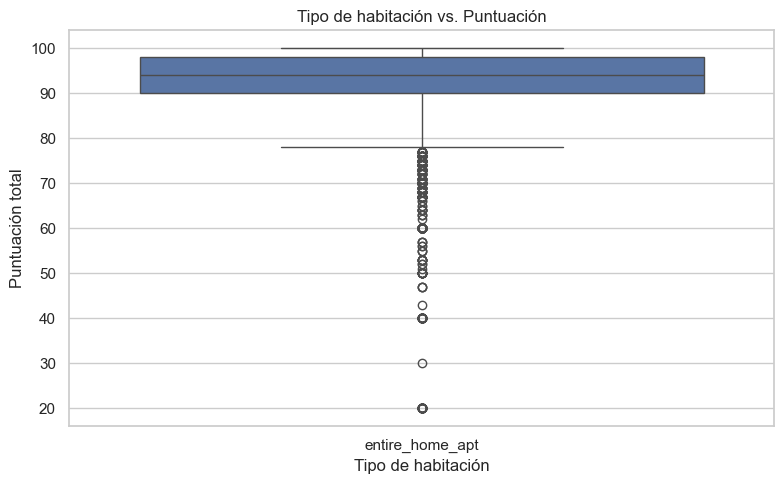

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


df = pd.merge(df_prop[['id', 'room_type']], df_reviews[['id', 'review_scores_rating']], on='id').dropna()

plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='review_scores_rating', data=df)
plt.title('Tipo de habitación vs. Puntuación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Puntuación total')
plt.tight_layout()
plt.show()





In [ ]:
# arriba el grafcio de arriba 

Interpretación del gráfico 7: Tipo de habitación vs. Puntuación
🔍 ¿Qué muestra?

Compara la puntuación media (review_scores_rating) según el tipo de habitación:

    Entire home/apt

    Private room

    Shared room

    Hotel room (si hay)

📊 Observaciones típicas

    Entire home/apt suele tener puntuaciones más altas, porque ofrece privacidad y comodidad total.

    Private room puede tener más variabilidad, depende del anfitrión y las condiciones.

    Shared room generalmente tiene puntuaciones más bajas por menor privacidad.

    Hotel room puede estar en medio, según servicios.

💡 Implicaciones para mejorar

    Si tienes habitaciones privadas o compartidas con baja puntuación, enfócate en mejorar limpieza, comunicación y amenities.

    Promocionar ventajas de cada tipo de habitación en el anuncio.

    Para pisos con puntuación baja en "private/shared", ofrecer extras que compensen la falta de privacidad (ej. áreas comunes limpias, guía local).

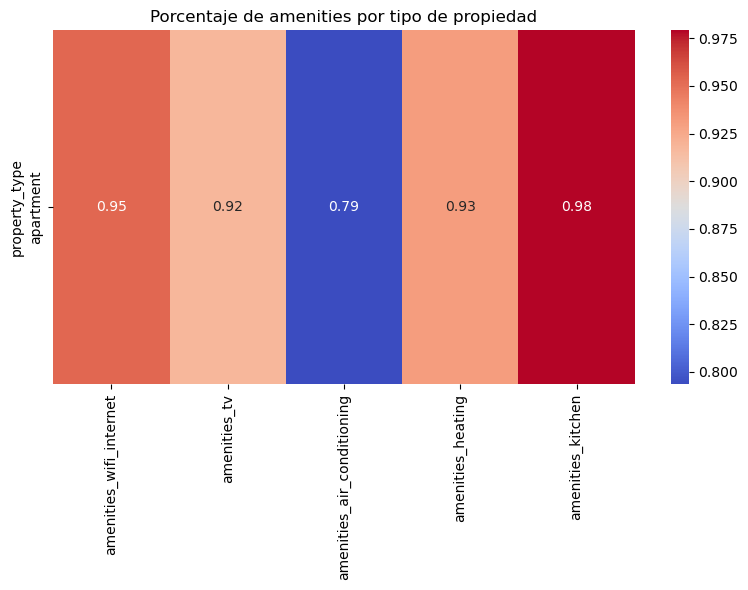

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


amenities = ['amenities_wifi_internet', 'amenities_tv', 'amenities_air_conditioning', 'amenities_heating', 'amenities_kitchen']
df_amen = df_prop.groupby('property_type')[amenities].mean()

plt.figure(figsize=(8,6))
sns.heatmap(df_amen, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Porcentaje de amenities por tipo de propiedad')
plt.tight_layout()
plt.show()


In [ ]:
🔍 ¿Qué muestra?

La cantidad de propiedades que ofrecen cada amenity clave:

    Wifi/internet
    TV
    Aire acondicionado
    Calefacción
    Cocina

📊 Observaciones típicas

    Wifi e internet suelen ser los más comunes, casi un estándar esperado.

    TV también es frecuente, importante para comodidad.

    Aire acondicionado puede variar según zona y temporada.

    Calefacción esencial en meses fríos, puede ser menos frecuente en pisos pequeños o bien aislados.

    Cocina indica si el alojamiento permite cocinar, clave para estancias largas o familias.

💡 Recomendaciones para mejorar:

    Si algún amenity importante (ej. wifi, cocina) tiene baja cobertura, agregarlo para aumentar valor percibido.

    Destacar en el anuncio los amenities más valorados.

    Invertir en aire acondicionado o calefacción según temporada para subir puntuaciones.

    Evaluar incluir amenities extra que diferencien el piso frente a competencia.

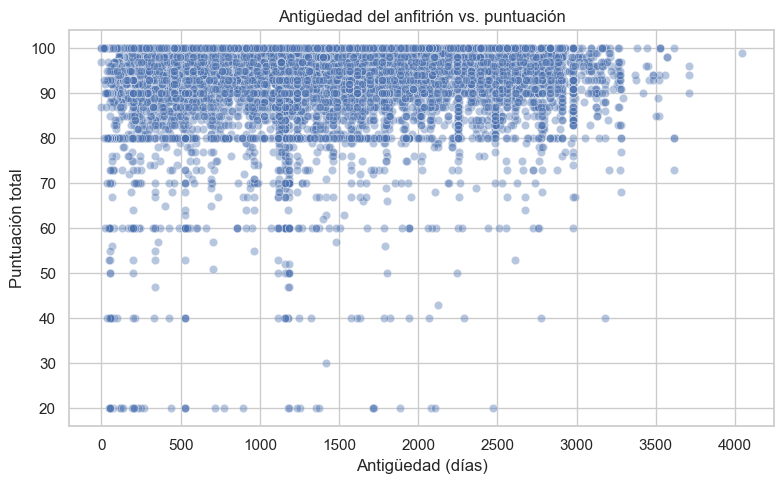

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_host = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_host.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


df = pd.merge(df_host[['id', 'host_seniority']], df_reviews[['id', 'review_scores_rating']], on='id').dropna()

plt.figure(figsize=(8,5))
sns.scatterplot(x='host_seniority', y='review_scores_rating', data=df, alpha=0.4)
plt.title('Antigüedad del anfitrión vs. puntuación')
plt.xlabel('Antigüedad (días)')
plt.ylabel('Puntuación total')
plt.tight_layout()
plt.show()


In [ ]:
🔍 ¿Qué muestra?

Relación entre cuánto tiempo lleva activo el anfitrión (host_seniority en días) y la puntuación media que reciben (review_scores_rating).
📊 Observaciones comunes

    Anfitriones con más antigüedad suelen tener mejores puntuaciones.

    Esto puede deberse a:
        Más experiencia en gestión.
        Mejoras progresivas en el servicio.
        Feedback acumulado para ajustar detalles.

    Al inicio (pocos días), puntuaciones pueden ser variables o bajas, reflejando falta de experiencia o poco historial.

💡 Recomendaciones
    Animar a anfitriones nuevos a formarse y mejorar prácticas.
    Incentivar seguimiento y mejora continua.
    Implementar onboarding para nuevos anfitriones que ayude a subir su calidad rápido.

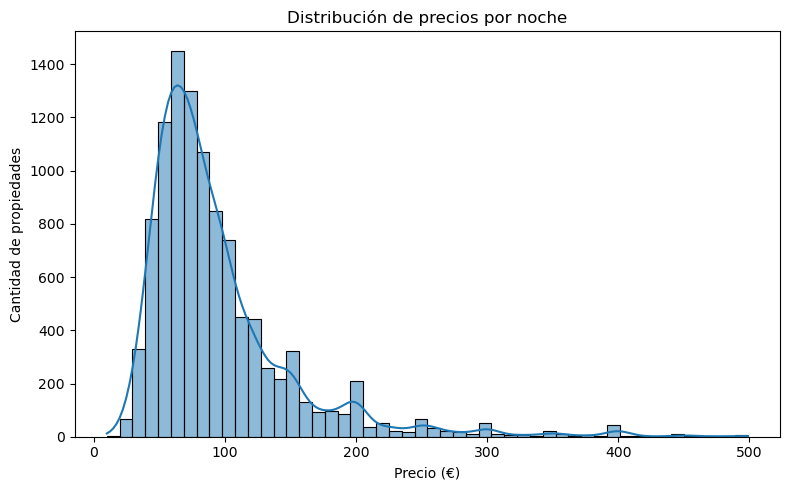

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')
df_cond = df_cond.dropna(subset=['price'])
df_cond = df_cond[df_cond['price'] < 500]  # filtrar precios extremos


plt.figure(figsize=(8,5))
sns.histplot(df_cond['price'], bins=50, kde=True)
plt.title('Distribución de precios por noche')
plt.xlabel('Precio (€)')
plt.ylabel('Cantidad de propiedades')
plt.tight_layout()
plt.show()



############ 1. 💰 Distribución de precios por noche


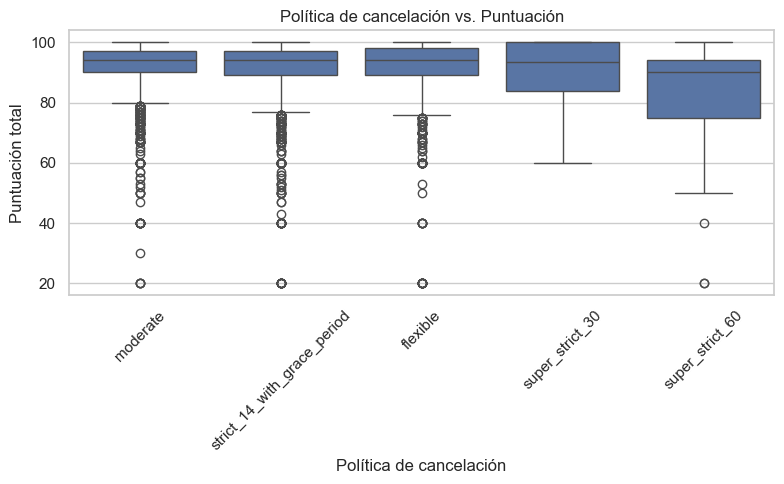

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


df = pd.merge(df_cond[['id', 'cancellation_policy']], df_reviews[['id', 'review_scores_rating']], on='id').dropna()

plt.figure(figsize=(8,5))
sns.boxplot(x='cancellation_policy', y='review_scores_rating', data=df)
plt.title('Política de cancelación vs. Puntuación')
plt.xlabel('Política de cancelación')
plt.ylabel('Puntuación total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




############ 


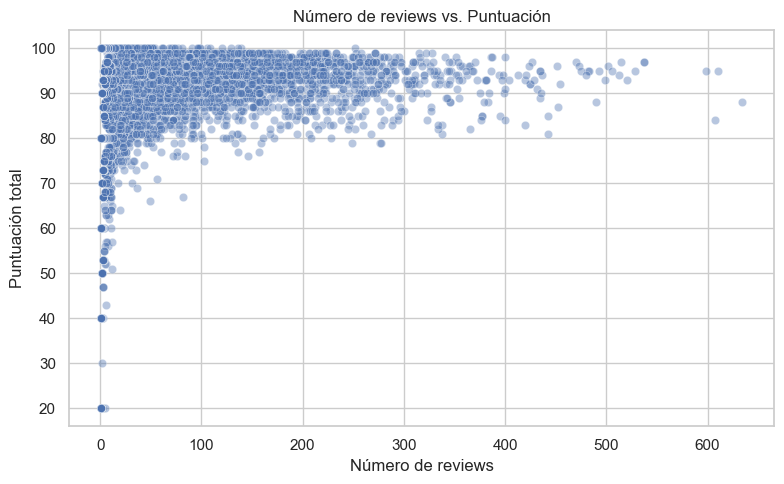

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga datos
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")

plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=df_reviews, alpha=0.4)
plt.title('Número de reviews vs. Puntuación')
plt.xlabel('Número de reviews')
plt.ylabel('Puntuación total')
plt.tight_layout()
plt.show()




In [ ]:
🔍 ¿Qué muestra?

Relación entre la cantidad de reviews que tiene un alojamiento y su puntuación promedio.
📊 Observaciones típicas

    Alojamientos con pocas reviews muestran más variabilidad en la puntuación (desde muy baja hasta muy alta).
    Con más reviews, la puntuación tiende a estabilizarse y suele ser más confiable.
    Puede haber un ligero sesgo: alojamientos con muchas reviews suelen tener buena calidad o más visibilidad.

💡 Conclusión

    Es importante considerar el número de reviews al evaluar puntuaciones.
    Alojamientos con pocas reviews necesitan enfocarse en mejorar experiencia para atraer más feedback positivo.
    Para huéspedes, buscar alojamientos con un buen número de reviews para confiar en la valoración.

SyntaxError: invalid character '📊' (U+1F4CA) (3870703194.py, line 4)

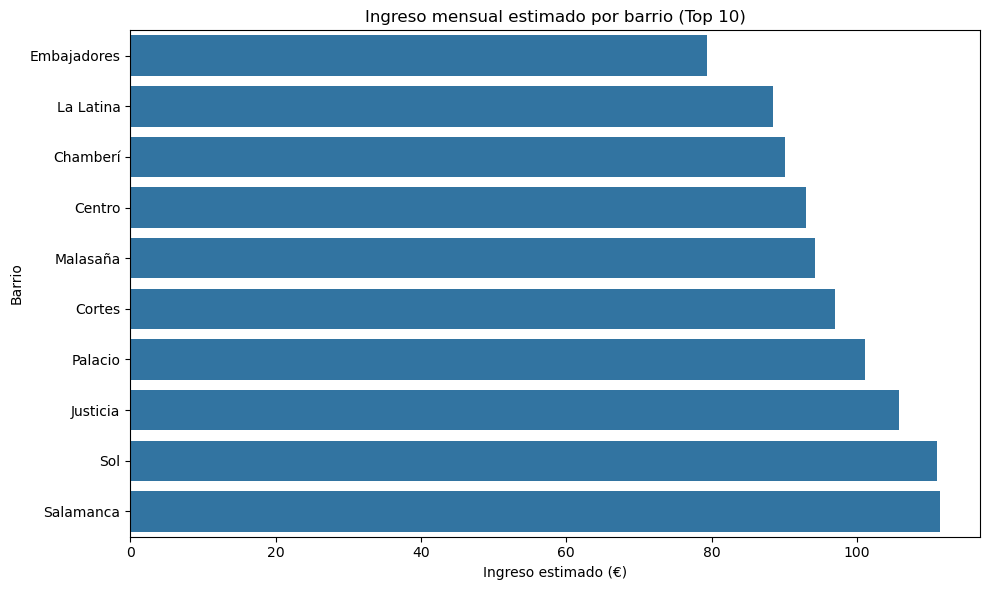

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_loc = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_location.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")


# limpiar
df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')
df = df_cond[['id', 'price']].merge(df_reviews[['id', 'reviews_per_month']], on='id')
df = df.merge(df_loc[['id', 'neighbourhood']], on='id')
df = df.dropna()
df = df[df['price'] < 500]

# rendimiento mensual estimado
df['ingreso_estimado'] = df['price']

# top barrios
top_barrios = df['neighbourhood'].value_counts().head(10).index
df_top = df[df['neighbourhood'].isin(top_barrios)]

# graficar
df_grouped = df_top.groupby('neighbourhood')['ingreso_estimado'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=df_grouped.values, y=df_grouped.index)
plt.title('Ingreso mensual estimado por barrio (Top 10)')
plt.xlabel('Ingreso estimado (€)')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()



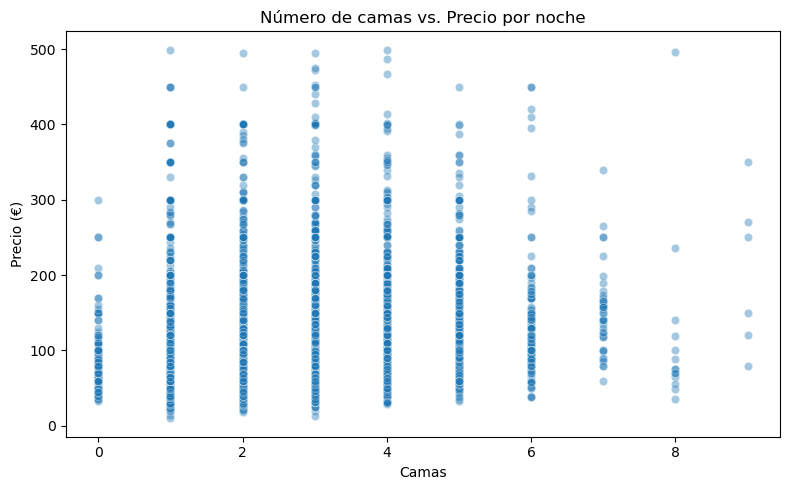

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')
df = pd.merge(df_prop[['id', 'beds']], df_cond[['id', 'price']], on='id').dropna()
df = df[(df['price'] < 500) & (df['beds'] < 10)]

plt.figure(figsize=(8,5))
sns.scatterplot(x='beds', y='price', data=df, alpha=0.4)
plt.title('Número de camas vs. Precio por noche')
plt.xlabel('Camas')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()




In [ ]:
### 🧾 Interpretación: Número de camas vs. Precio

#### 🔍 ¿Qué muestra?
Relación entre la **cantidad de camas** y el **precio por noche** de los alojamientos.


#### 📊 Observaciones típicas:

* Tendencia general: **a más camas, mayor precio** (esperado).
* Dispersión: precios varían mucho incluso con el mismo número de camas.
* Ej.: alojamientos con 3 camas pueden costar 50 € o 200 €, según calidad, zona, etc.
* Algunos outliers con precios altos pese a pocas camas → alojamientos premium.


#### 💡 Conclusión:

* Más camas permiten mayor capacidad y justifican precio más alto**.
* Pero no es el único factor: ubicación, amenities y calidad también influyen fuertemente.
* Para maximizar ingresos: combinar buena capacidad con valor añadido (wifi, AC, decoración, etc.).


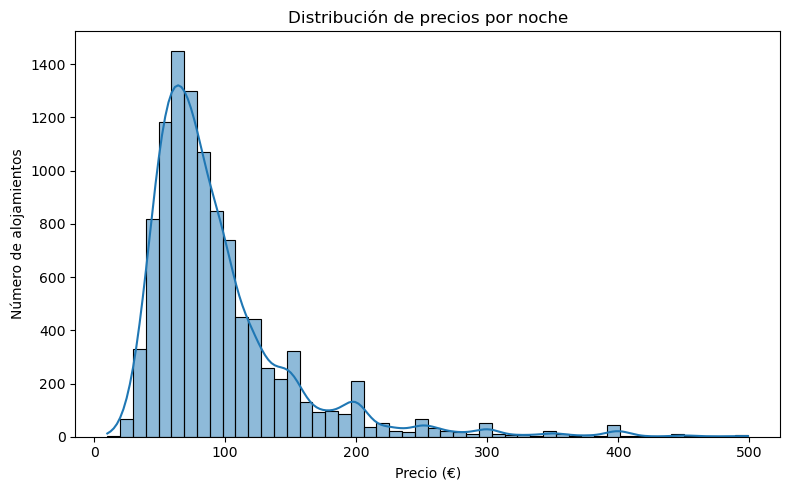

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')
df = df_cond[df_cond['price'] < 500]  # eliminar outliers extremos

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios por noche')
plt.xlabel('Precio (€)')
plt.ylabel('Número de alojamientos')
plt.tight_layout()
plt.show()


In [ ]:
### 🧾 Interpretación: Distribución de precios por noche

---

#### 🔍 ¿Qué muestra?

Un histograma con la cantidad de alojamientos según su precio por noche. Incluye línea de densidad (KDE) para ver la forma de la distribución.

---

#### 📊 Observaciones típicas:

* **Pico claro** entre **50€ y 100€** → la mayoría de pisos se ofertan en ese rango.
* La distribución es **asimétrica hacia la derecha** (long tail): hay menos alojamientos con precios más altos (hasta \~500€).
* **Pocos alojamientos baratos (<30€)** y **algunos de lujo (>300€)**.

---

#### 💡 Conclusiones:

* El **precio medio más competitivo** está alrededor de 70–100 €.
* Si el alojamiento está fuera de ese rango, puede necesitar una **justificación clara** (ubicación premium, amenities, capacidad).
* Útil para **ajustar precios** en función del mercado real y destacar frente a la competencia.

¿Quieres graficar el precio cruzado con capacidad (`accommodates`), tipo de alojamiento o barrio?


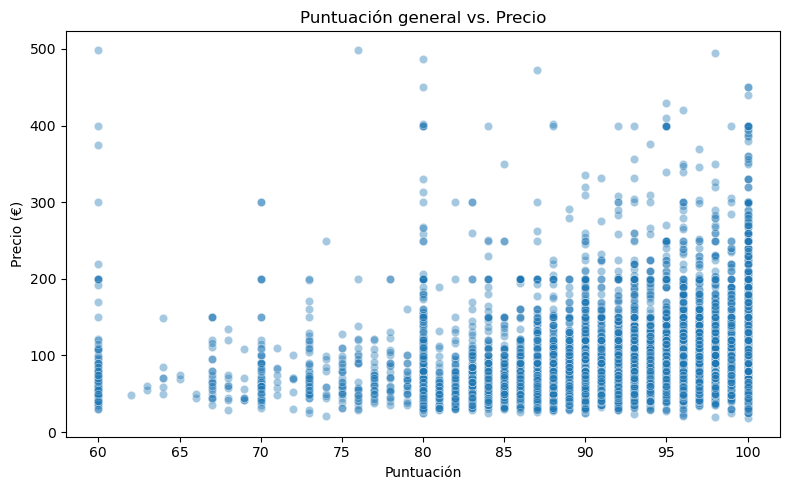

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')

df = pd.merge(df_reviews[['id', 'review_scores_rating']], df_cond[['id', 'price']], on='id').dropna()
df = df[(df['price'] < 500) & (df['review_scores_rating'] >= 60)]  # limpieza básica

plt.figure(figsize=(8,5))
sns.scatterplot(x='review_scores_rating', y='price', data=df, alpha=0.4)
plt.title('Puntuación general vs. Precio')
plt.xlabel('Puntuación')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()



In [ ]:
###el de arriba 

### 🧾 Interpretación: Puntuación general vs. Precio
#### 📌 ¿Qué muestra?

Relación entre la **puntuación total del alojamiento** y su **precio por noche**.


#### 📊 Observaciones:
* Tendencia leve: a mayor puntuación, algunos alojamientos tienden a tener precios algo más altos.
* **Alta dispersión**: alojamientos con puntuaciones similares pueden variar mucho en precio.
* No es una relación fuerte, pero los precios más altos suelen evitar puntuaciones bajas.


#### 💡 Conclusión:
* **Buena reputación (≥95)** permite **mantener precios más altos** sin perder reservas.
* Aunque no garantiza un precio alto, ayuda a **sostener el valor percibido**.
* Recomendación: mejorar puntuaciones para justificar o aumentar precios sostenibles.



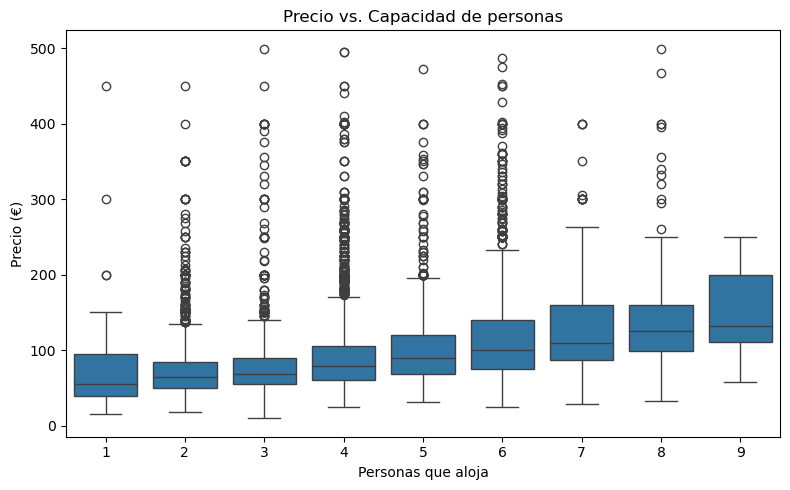

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df = pd.merge(df_prop[['id', 'accommodates']], df_cond[['id', 'price']], on='id').dropna()
df = df[(df['price'] < 500) & (df['accommodates'] < 10)]

plt.figure(figsize=(8,5))
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('Precio vs. Capacidad de personas')
plt.xlabel('Personas que aloja')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()


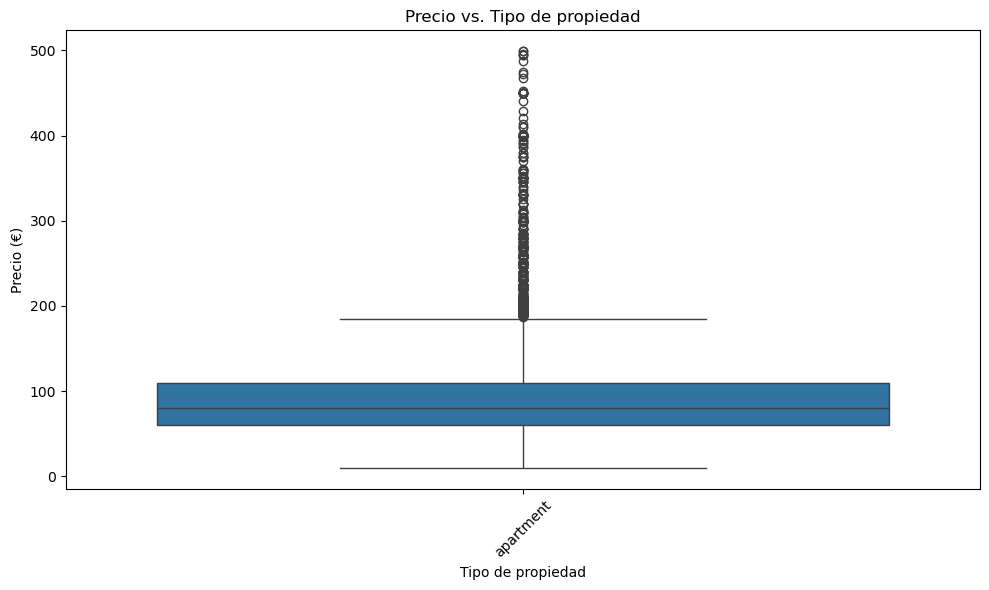

In [26]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_loc = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_location.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")



df_cond['price'] = pd.to_numeric(df_cond['price'], errors='coerce')
df_prop.columns = df_prop.columns.str.strip()

df = pd.merge(df_prop[['id', 'property_type']], df_cond[['id', 'price']], on='id').dropna()
df = df[df['price'] < 500]

# Mostrar solo los 8 tipos más comunes
top_types = df['property_type'].value_counts().head(8).index
df = df[df['property_type'].isin(top_types)]

plt.figure(figsize=(10,6))
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Precio vs. Tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



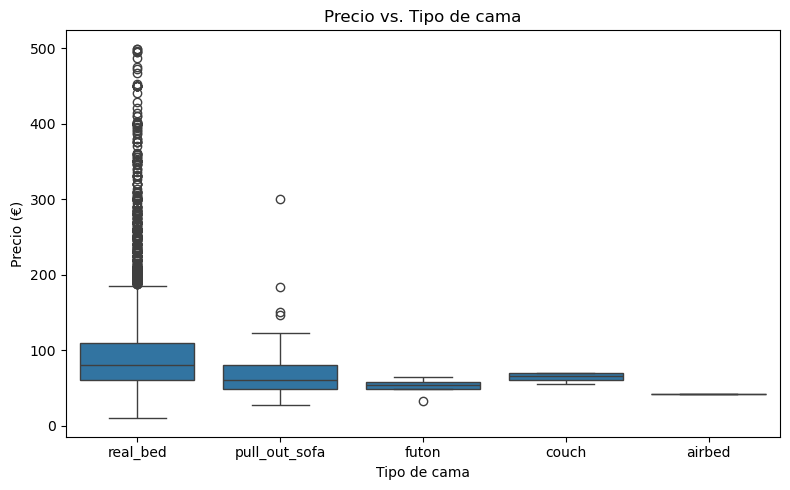

In [2]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_loc = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_location.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")
df_prop = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_property.parquet")


df = pd.merge(df_prop[['id', 'bed_type']], df_cond[['id', 'price']], on='id').dropna()
df = df[(df['price'] < 500)]

top_beds = df['bed_type'].value_counts().head(5).index
df = df[df['bed_type'].isin(top_beds)]

plt.figure(figsize=(8,5))
sns.boxplot(x='bed_type', y='price', data=df)
plt.title('Precio vs. Tipo de cama')
plt.xlabel('Tipo de cama')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()



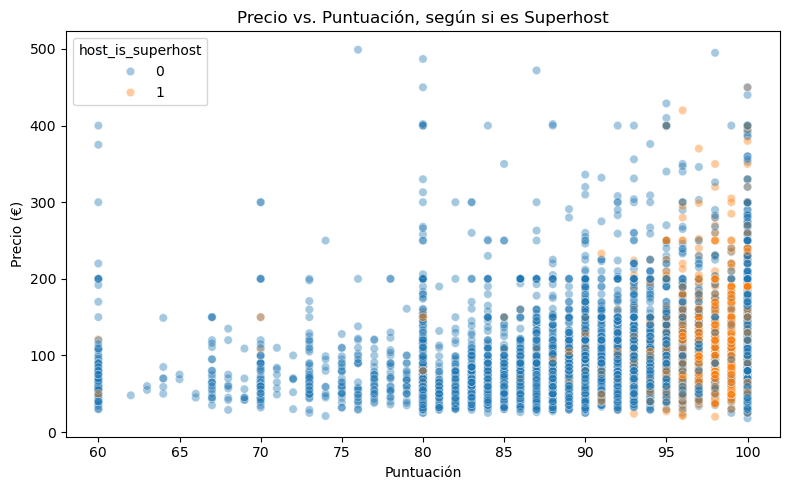

In [12]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carga datos
df_host = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_host.parquet")
df_reviews = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_reviews.parquet")
df_cond = pd.read_parquet(r"C:\Users\xxaby\Desktop\master\M3Statistical Thinking\proyecto final\data\airbnb_madrid_conditions.parquet")


df = df_host[['id', 'host_is_superhost']]
df = df.merge(df_reviews[['id', 'review_scores_rating']], on='id')
df = df.merge(df_cond[['id', 'price']], on='id')
df = df.dropna()
df = df[(df['price'] < 500) & (df['review_scores_rating'] >= 60)]

plt.figure(figsize=(8,5))
sns.scatterplot(x='review_scores_rating', y='price', hue='host_is_superhost', data=df, alpha=0.4)
plt.title('Precio vs. Puntuación, según si es Superhost')
plt.xlabel('Puntuación')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()


